### GARCH model:


In [3]:
%pip install arch

Note: you may need to restart the kernel to use updated packages.


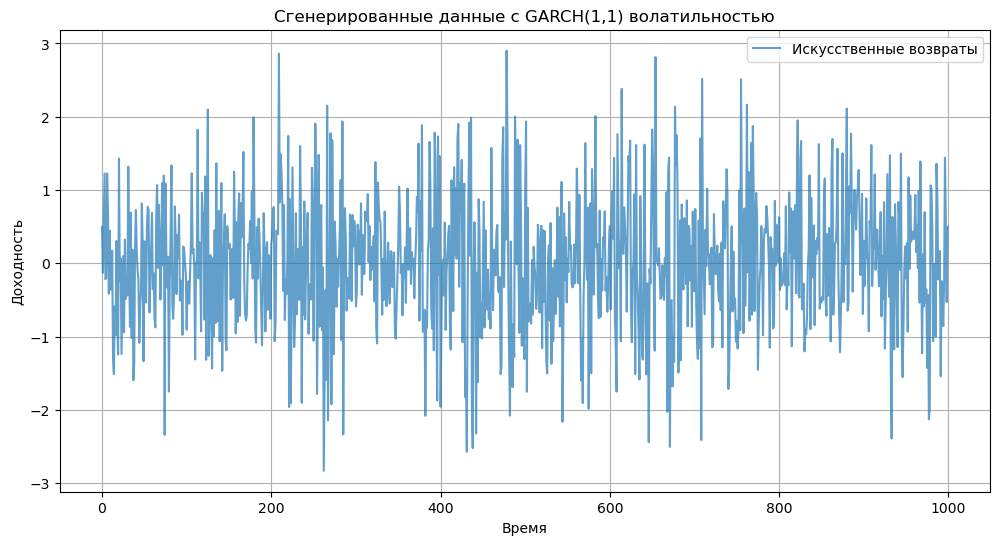

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1281.8490346931421
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1281.7102386580887
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1281.71
Distribution:                  Normal   AIC:                           2571.42
Method:            Maximum Likelihood   BIC:                           2591.05
                                        No. Observations:                 1000
Date:                Sun, Mar 30 2025   Df Residuals:                      999
Time:                        21:36:29   Df Model:                            1
        

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# --- Шаг 1: Генерация искусственных данных ---
np.random.seed(42)
n = 1000  # Количество наблюдений
omega = 0.1  # Константа в уравнении дисперсии
alpha = 0.2  # Коэффициент ARCH (влияние прошлых шоков)
beta = 0.7   # Коэффициент GARCH (влияние прошлой дисперсии)

# Генерируем условную волатильность (sigma_t) и возвраты (r_t)
sigma2 = np.zeros(n)  # Дисперсия
returns = np.zeros(n)  # Доходности

# Первое значение (нужно для инициализации)
sigma2[0] = omega / (1 - alpha - beta)  # Стационарная дисперсия
returns[0] = np.random.normal(0, np.sqrt(sigma2[0]))

# Генерация данных по GARCH(1,1)
for t in range(1, n):
    sigma2[t] = omega + alpha * returns[t-1]**2 + beta * sigma2[t-1]
    returns[t] = np.random.normal(0, np.sqrt(sigma2[t]))

# Преобразуем в pandas Series (как реальные данные)
returns_series = pd.Series(returns, name='Returns')

# --- Шаг 2: Визуализация данных ---
plt.figure(figsize=(12, 6))
plt.plot(returns_series, label='Искусственные возвраты', alpha=0.7)
plt.title('Сгенерированные данные с GARCH(1,1) волатильностью')
plt.xlabel('Время')
plt.ylabel('Доходность')
plt.legend()
plt.grid()
plt.show()

# --- Шаг 3: Построение модели GARCH(1,1) ---
model = arch_model(returns_series, vol='GARCH', p=1, q=1)
results = model.fit(update_freq=5)  # update_freq - частота вывода лога

# Вывод результатов
print(results.summary())

# --- Шаг 4: Анализ остатков ---
# Остатки модели (стандартизированные)
residuals = results.resid / results.conditional_volatility

# Проверка на автокорреляцию (Ljung-Box test)
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals, lags=10)
print("\nТест Люнга-Бокса на остатках (p-значения):")
print(lb_test.lb_pvalue)

# --- Шаг 5: Прогнозирование волатильности ---
forecasts = results.forecast(horizon=5)
print("\nПрогноз волатильности на 5 шагов вперед:")
print(forecasts.variance.iloc[-1])